In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [188]:
data_global= pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)
data_india= pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)
# data_global.index.freq='MS'
# data_india.index.freq='MS'

data_global_resampled = data_global.resample('MS').sum()
# resampled_g = data_global_resampled.interpolate(method='linear')
data_global_resampled.index.freq = 'MS'

C:\Users\sneha\AppData\Local\Temp\ipykernel_19608\800959505.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_global= pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)
C:\Users\sneha\AppData\Local\Temp\ipykernel_19608\800959505.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_india= pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)


In [189]:
data_global_resampled.head()

,Cases
Date,
2020-01-01,210067256
2020-02-01,213850960
2020-03-01,222778254
2020-04-01,264579373
2020-05-01,319540566


<Axes: xlabel='Date'>

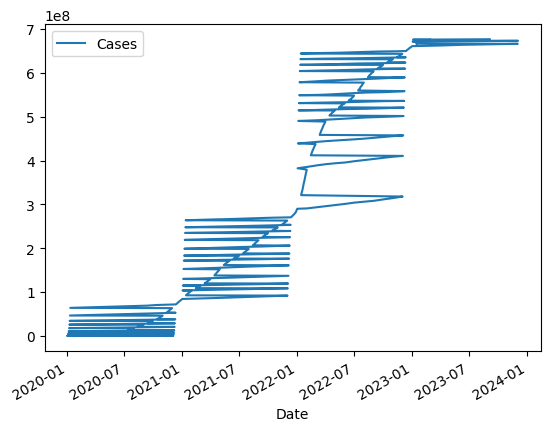

In [190]:
data_global.plot()

<Axes: xlabel='Date'>

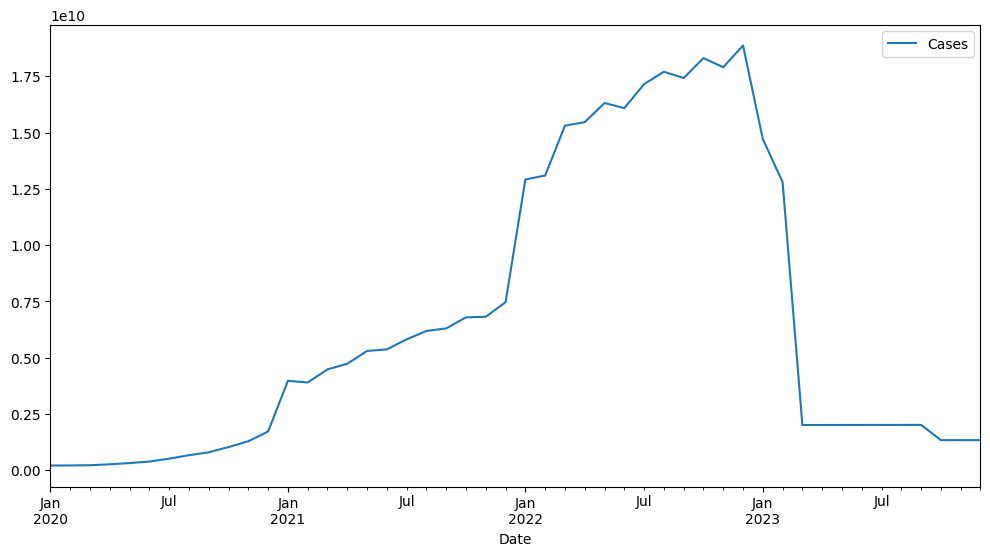

In [191]:
data_global_resampled.plot(figsize=(12,6))

<Axes: xlabel='Date'>

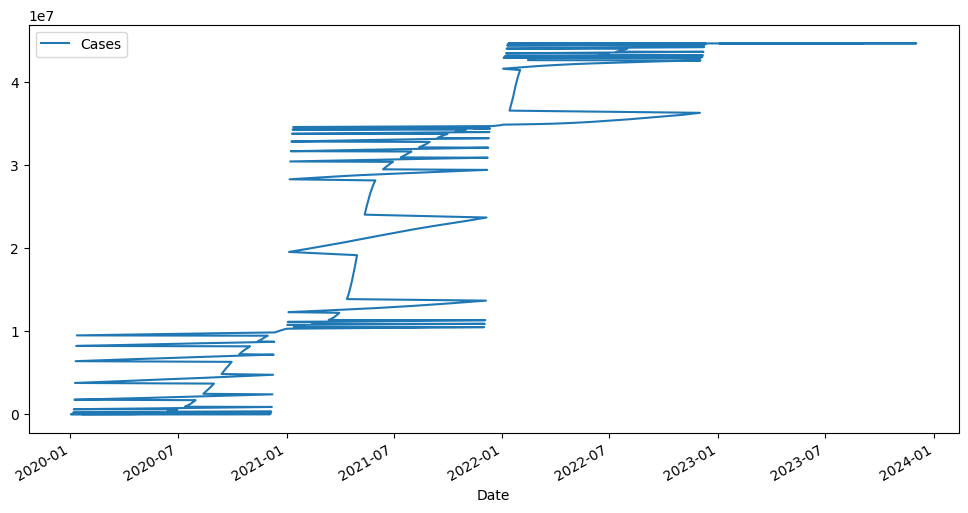

In [63]:
data_india.plot(figsize=(12,6))

In [143]:
data_india_resampled = data_india.resample('W').sum()
resampled_i = data_india_resampled.interpolate(method='linear')
resampled_i.index.freq = 'W'

<Axes: xlabel='Date'>

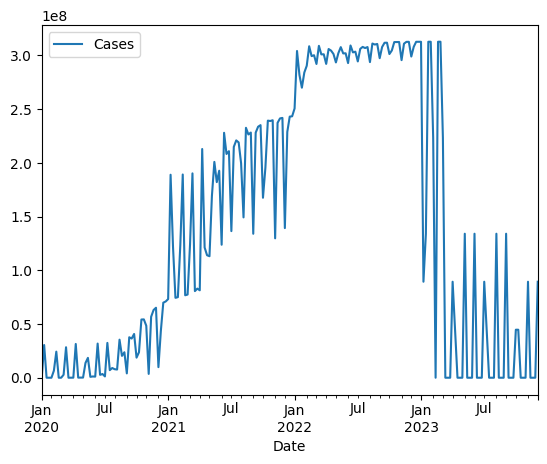

In [145]:
resampled_i.plot()

data_india_resampled.head()

<Axes: xlabel='Date'>

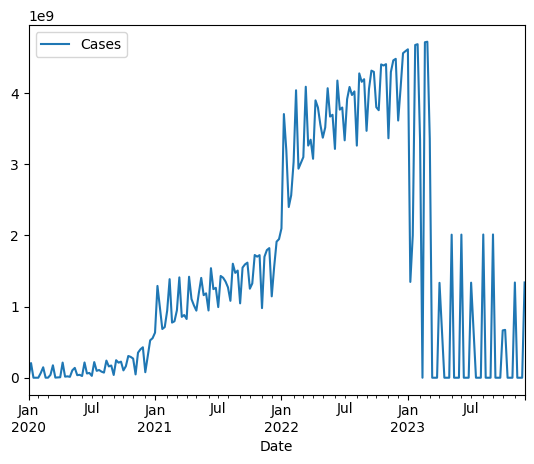

In [146]:
resampled_g.plot()

In [65]:
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


<Axes: xlabel='Date'>

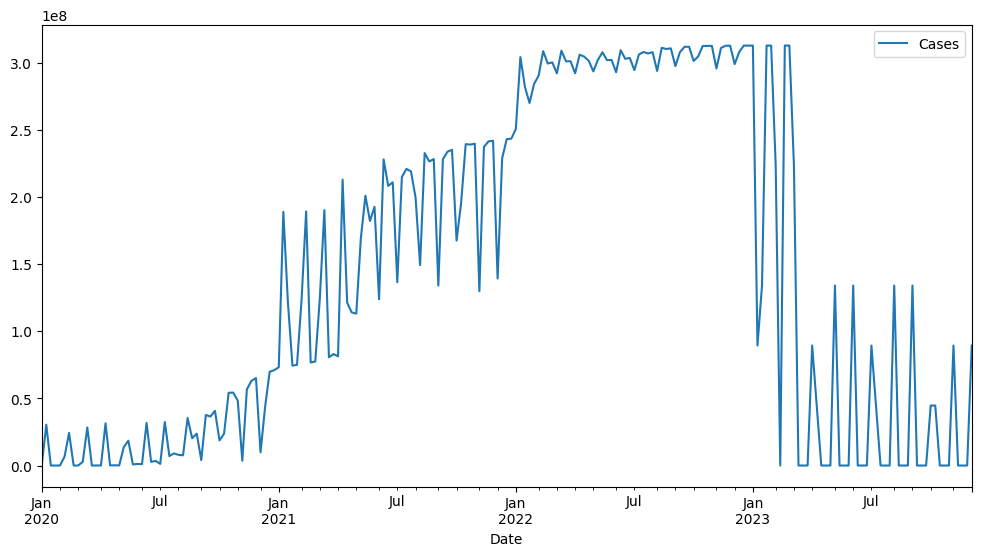

In [66]:
data_india_resampled.plot(figsize=(12,6))

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
data_india_resampled.head()

,Cases
Date,
2020-01-05,39259
2020-01-12,30446051
2020-01-19,0
2020-01-26,0
2020-02-02,4


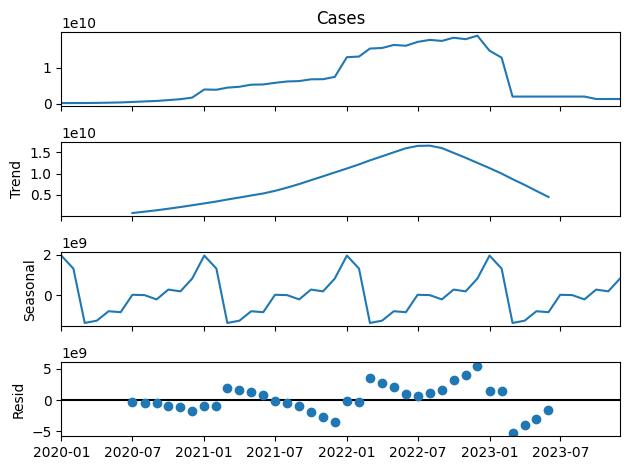

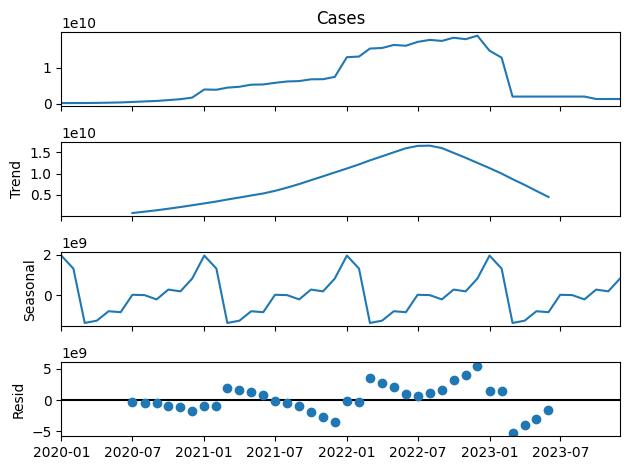

In [192]:
results_g = seasonal_decompose(data_global_resampled['Cases'])
results_g.plot()

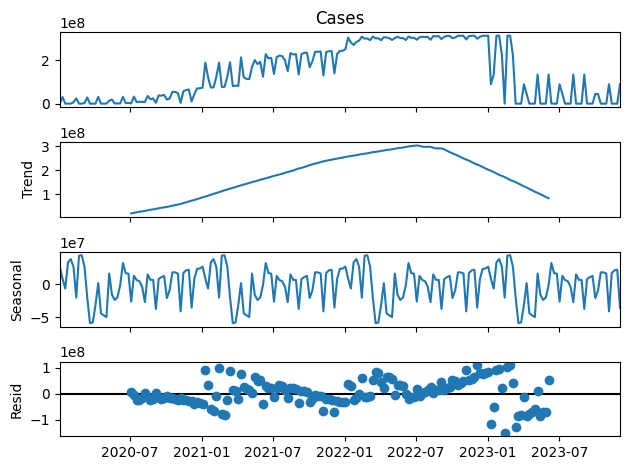

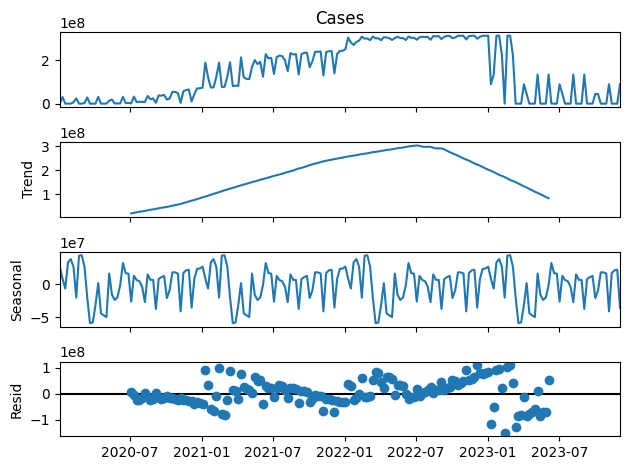

In [148]:
results_i = seasonal_decompose(resampled_i['Cases'])
results_i.plot()

In [194]:
len(data_global_resampled)

48

In [150]:
len(resampled_g)

205

In [73]:
len(data_india)

1143

In [195]:
48*0.8

38.400000000000006

In [244]:
train_global=data_global_resampled.iloc[:38]
test_global=data_global_resampled.iloc[38:]

In [245]:
test_global.shape

(10, 1)

In [86]:
! pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.6 MB 812.7 kB/s eta 0:00:13
   ---------------------------------------- 0.1/10.6 MB 657.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/10.6 MB 476.3 kB/s eta 0:00:23
   ---------------------------------------- 0.1/10.6 MB 504.4 kB/s eta 0:00:21
   ---------------------------------------- 0.1/10.6 MB 504.4 kB/s eta 0:00:21
   ---------------------------------------- 0.1/10.6 MB 423.5 kB/s eta 0:00:25
    --------------------------------------- 0.1/10.6 MB 425.3 kB/s eta 0:00:25
    --------------------------------------- 0.2/10.6 MB 427.9 kB/s eta 0:00:25
    --------------------------------------- 0.2/10.6 MB 436.8 kB/s eta 0:00:24
    --------------------------------------- 0.2/10.6 MB 402.0 kB

In [197]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [88]:
data_global_resampled.head(),data_global_resampled.tail()

(                Cases
 Date                 
 2020-01-05    4427201
 2020-01-12  205601498
 2020-01-19          0
 2020-01-26       5715
 2020-02-02      49629,
                  Cases
 Date                  
 2023-11-05  1338448957
 2023-11-12           0
 2023-11-19           0
 2023-11-26           0
 2023-12-03  1339003716)

In [246]:
scaler.fit(data_global_resampled)
scaled_train_g = scaler.transform(train_global)
scaled_test_g = scaler.transform(test_global)


In [247]:
scaled_train_g,scaled_test_g

(array([[0.00000000e+00],
        [2.02809413e-04],
        [6.81319164e-04],
        [2.92189095e-03],
        [5.86785271e-03],
        [9.42417218e-03],
        [1.63717540e-02],
        [2.46024274e-02],
        [3.15248132e-02],
        [4.39632944e-02],
        [5.78403189e-02],
        [8.11295017e-02],
        [2.01676035e-01],
        [1.97708554e-01],
        [2.28936961e-01],
        [2.42307870e-01],
        [2.72761263e-01],
        [2.76549266e-01],
        [3.00414241e-01],
        [3.20446134e-01],
        [3.26528076e-01],
        [3.52778254e-01],
        [3.54258993e-01],
        [3.88828338e-01],
        [6.81059026e-01],
        [6.90461576e-01],
        [8.09245326e-01],
        [8.17496078e-01],
        [8.63081478e-01],
        [8.50908876e-01],
        [9.08067297e-01],
        [9.37639448e-01],
        [9.22612879e-01],
        [9.70070822e-01],
        [9.48360520e-01],
        [1.00000000e+00],
        [7.77426237e-01],
        [6.74661114e-01]]),
 array([[0

In [248]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
  # define generator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train_g, scaled_train_g, length=n_input, batch_size=1)
        

In [249]:
X_g,y_g = generator[0]
print(f'Given the Array: \n{X_g.flatten()}')
print(f'Predict this y: \n {y_g}')

Given the Array: 
[0.         0.00020281 0.00068132 0.00292189 0.00586785 0.00942417
 0.01637175 0.02460243 0.03152481 0.04396329]
Predict this y: 
 [[0.05784032]]


In [250]:
X_g.shape

(1, 10, 1)

In [251]:
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train_g, scaled_train_g, length=n_input, batch_size=1)

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [253]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [254]:
model.summary()
     


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [255]:
model.fit(generator,epochs=50)

Epoch 1/50


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1908
Epoch 2/50
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4690

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1376
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0959
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0479
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086  
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096  
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143
Epoch 16/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 17/50
32/32 ━━━━━━

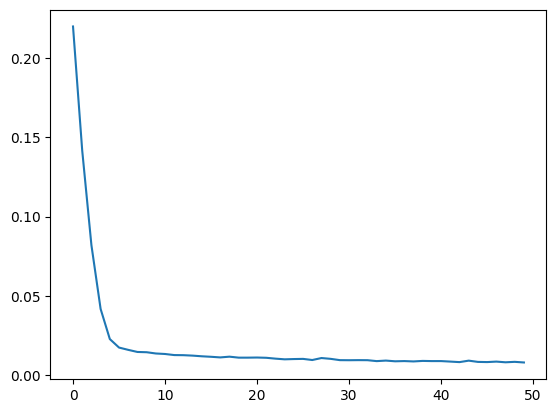

In [256]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

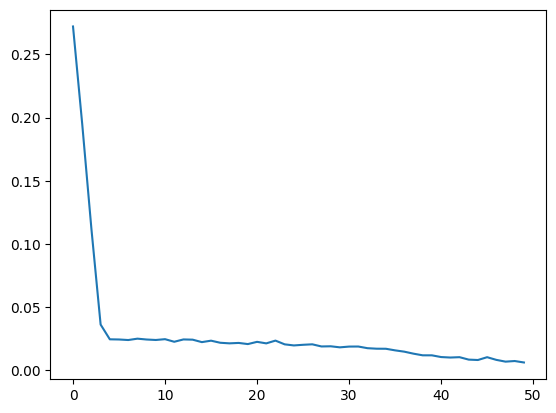

In [235]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

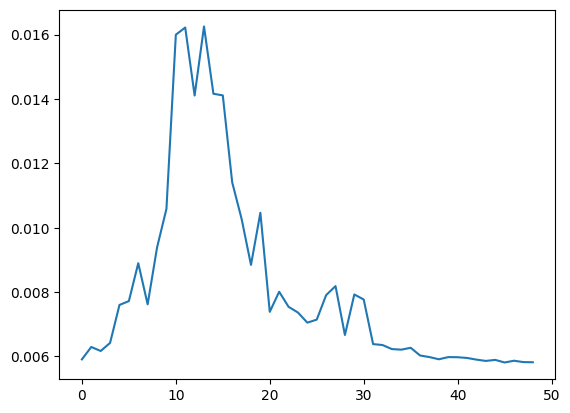

In [124]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [257]:
# testing the prediction of the model
last_train_batch = scaled_train_g[-6:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


array([[0.85763454]], dtype=float32)

In [218]:
scaled_test_g[0]

array([0.09642979])

In [258]:
test_predictions = []

first_eval_batch = scaled_train_g[-n_input:]
# print(first_eval_batch)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_global)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [259]:
test_predictions

[array([0.85763454], dtype=float32),
 array([0.88602006], dtype=float32),
 array([0.89634866], dtype=float32),
 array([0.900369], dtype=float32),
 array([0.89875644], dtype=float32),
 array([0.90980405], dtype=float32),
 array([0.92969817], dtype=float32),
 array([0.9406779], dtype=float32),
 array([0.9486361], dtype=float32),
 array([0.95585346], dtype=float32)]

In [260]:
test_global.head()
     

,Cases
Date,
2023-03-01,2009105021
2023-04-01,2009832407
2023-05-01,2010712972
2023-06-01,2011635853
2023-07-01,2012321112


In [262]:
true_predictions = scaler.inverse_transform(test_predictions)
test_global['Predictions'] = true_predictions
demo=test_global
demo["scaled_ored"]=scaler.inverse_transform(scaled_test_g)
true_predictions

C:\Users\sneha\AppData\Local\Temp\ipykernel_19608\2346439517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_global['Predictions'] = true_predictions
C:\Users\sneha\AppData\Local\Temp\ipykernel_19608\2346439517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo["scaled_ored"]=scaler.inverse_transform(scaled_test_g)


array([[1.62104846e+10],
       [1.67400577e+10],
       [1.69327525e+10],
       [1.70077577e+10],
       [1.69776733e+10],
       [1.71837824e+10],
       [1.75549361e+10],
       [1.77597786e+10],
       [1.79082510e+10],
       [1.80429011e+10]])

<Axes: xlabel='Date'>

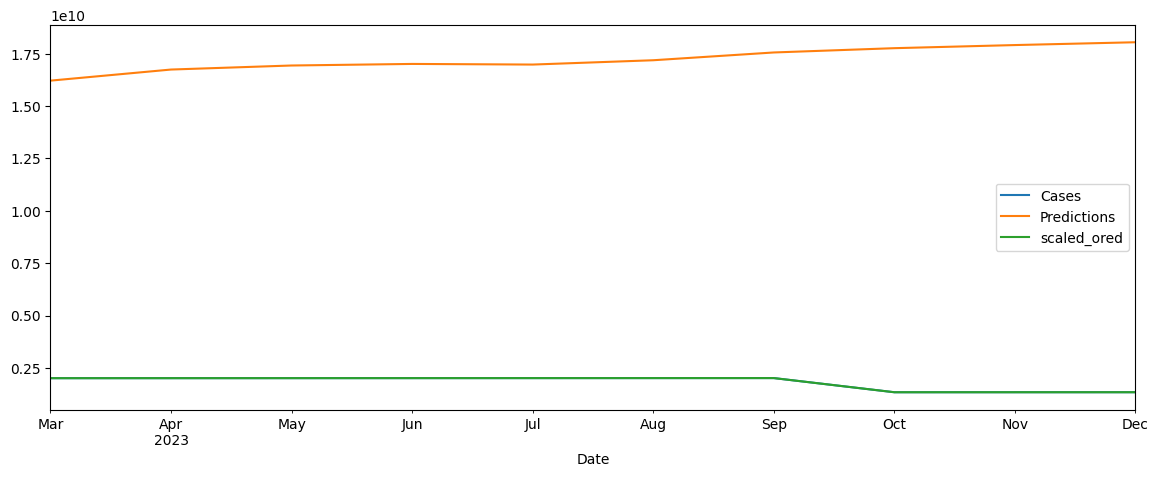

In [263]:
test_global.plot(figsize=(14,5))
     